#### TF-IDF

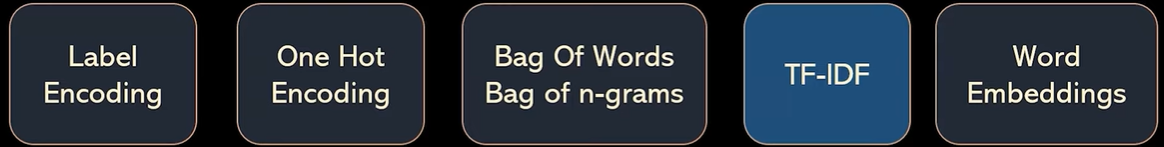

* TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a numerical statistic used in natural language processing (NLP) and information retrieval to evaluate the importance of a word in a document relative to a collection of documents (corpus). It is commonly used to highlight words that are particularly important or distinctive in a given document.



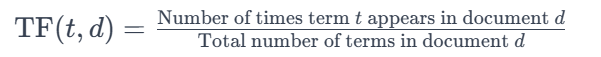

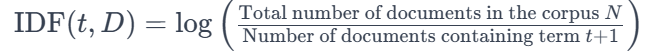

##### TF-IDF Score:

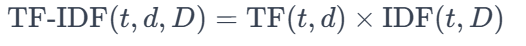

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=[
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amzon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes",
    "Something is amazing",    
]

In [2]:
v=TfidfVectorizer()
transformed_output=v.fit_transform(corpus)
print(v.vocabulary_)

{'thor': 27, 'eating': 11, 'pizza': 23, 'loki': 18, 'is': 17, 'ironman': 16, 'ate': 8, 'already': 0, 'apple': 6, 'announcing': 5, 'new': 21, 'iphone': 15, 'tomorrow': 28, 'tesla': 26, 'model': 20, 'google': 13, 'pixel': 22, 'microsoft': 19, 'surface': 25, 'amzon': 3, 'eco': 12, 'dot': 10, 'am': 1, 'biryani': 9, 'and': 4, 'you': 29, 'are': 7, 'grapes': 14, 'something': 24, 'amazing': 2}


In [3]:
v.get_feature_names_out()

array(['already', 'am', 'amazing', 'amzon', 'and', 'announcing', 'apple',
       'are', 'ate', 'biryani', 'dot', 'eating', 'eco', 'google',
       'grapes', 'iphone', 'ironman', 'is', 'loki', 'microsoft', 'model',
       'new', 'pixel', 'pizza', 'something', 'surface', 'tesla', 'thor',
       'tomorrow', 'you'], dtype=object)

In [4]:
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    indx = v.vocabulary_.get(word)
    print(f"{word} {v.idf_[indx]}")

already 2.504077396776274
am 2.504077396776274
amazing 2.504077396776274
amzon 2.504077396776274
and 2.504077396776274
announcing 1.4054651081081644
apple 2.504077396776274
are 2.504077396776274
ate 2.504077396776274
biryani 2.504077396776274
dot 2.504077396776274
eating 2.09861228866811
eco 2.504077396776274
google 2.504077396776274
grapes 2.504077396776274
iphone 2.504077396776274
ironman 2.504077396776274
is 1.1177830356563834
loki 2.504077396776274
microsoft 2.504077396776274
model 2.504077396776274
new 1.4054651081081644
pixel 2.504077396776274
pizza 2.504077396776274
something 2.504077396776274
surface 2.504077396776274
tesla 2.504077396776274
thor 2.504077396776274
tomorrow 1.4054651081081644
you 2.504077396776274


In [5]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [6]:
transformed_output.toarray()[:2]

array([[0.24247317, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.24247317, 0.        ,
        0.        , 0.40642288, 0.        , 0.        , 0.        ,
        0.        , 0.24247317, 0.10823643, 0.24247317, 0.        ,
        0.        , 0.        , 0.        , 0.7274195 , 0.        ,
        0.        , 0.        , 0.24247317, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.31652498, 0.5639436 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5639436 , 0.        , 0.25173606, 0.        , 0.        ,
        0.        , 0.31652498, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.31652498, 0.        ]])

In [7]:
import pandas as pd

###### Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

In [8]:
#read the data into a pandas dataframe
df=pd.read_csv("C:/Users/Damodhara/Desktop/DSMP Dataset/Ecommerce_data.csv")

In [9]:
print(df.shape)
df.head()

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [10]:
##check the distribution of labels 
df.label.value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

* From the above, we can see that almost all the labels(classes) occured equal number of times and perfectly balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [11]:
#Add the new column which gives a unique number to each of these labels 
df['label_num']=df.label.map({
    
    "Household":0,
    "Books":1,
    "Electronics":2,
    "Clothing & Accessories":3
})

In [12]:
df['label_num']

0        0
1        0
2        2
3        3
4        3
        ..
23995    1
23996    1
23997    0
23998    2
23999    2
Name: label_num, Length: 24000, dtype: int64

In [13]:
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


#### Build a model with original text (no pre processing)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2, #20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [15]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [16]:
y_train.value_counts()

0    4800
2    4800
3    4800
1    4800
Name: label_num, dtype: int64

In [17]:
y_test.value_counts()

0    1200
2    1200
3    1200
1    1200
Name: label_num, dtype: int64

In [18]:
#predicting the model using KneighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [19]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [20]:
X_test[:5]

20706    Lal Haveli Designer Handmade Patchwork Decorat...
19166    GOTOTOP Classical Retro Cotton & PU Leather Ne...
15209    FabSeasons Camouflage Polyester Multi Function...
2462     Indian Superfoods: Change the Way You Eat Revi...
6621     Milton Marvel Insulated Steel Casseroles, Juni...
Name: Text, dtype: object

In [21]:
y_test[:5]

20706    0
19166    2
15209    3
2462     1
6621     3
Name: label_num, dtype: int64

In [22]:
y_pred[:5]

array([0, 2, 3, 1, 0], dtype=int64)

#### Attempt 2:

* 1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

#### Note:

* use TF-IDF for pre-processing the text.

* use MultinomialNB as the classifier.

* print the classification report.

In [23]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



#### Attempt 3:

* 1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

#### Note:

* use TF-IDF for pre-processing the text.


* use Random Forest as the classifier.


* print the classification report.

In [24]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.96      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



* Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [25]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [26]:
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [27]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer Women Art Mysore Silk Saree Bl...


In [28]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [29]:
df.preprocessed_txt[0]

'Urban Ladder Eisner low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

In [ ]:
# Build a model with pre processed text

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

* Let's check the scores with our best model till now

In [ ]:
# Random Forest


In [31]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



* If you compare above classification report with respect to RandomForest Model with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. The F1 score improved in the case of preprocessed data. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.

In [32]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1157,    9,   16,   18],
       [  20, 1172,    5,    3],
       [  21,    8, 1167,    4],
       [   9,    3,    1, 1187]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

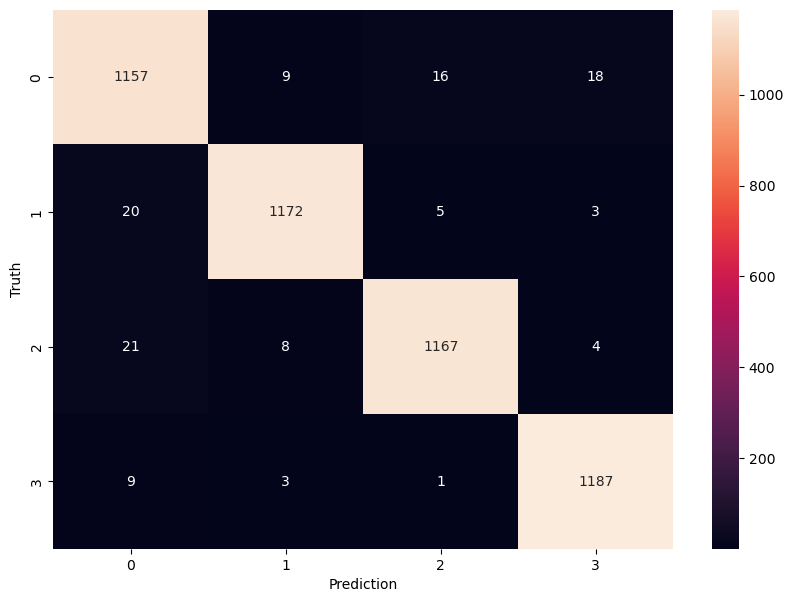

In [33]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')